# Polynomial Fitting
Link to the relevant notes [here](https://www.notion.so/Introduction-ab7aab5fccb14577a40adcf2acecf7af). We fit a polynomial to sin(x) by minimizing the sum of squares error.

In [1]:
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np

In [2]:
x_range = (0, 2*np.pi)
sin_x = np.arange(x_range[0], x_range[1], 0.1)
sin_y = np.sin(sin_x)

In [3]:
# We create the training data by sampling from sin(x) and adding Gaussian noise

training_data_size = 10
training_data_x = np.random.sample((training_data_size,)) * (x_range[1] - x_range[0]) + x_range[0]

std_dev = 0.1
noise = np.random.normal(0, std_dev, training_data_size)
training_data_y = np.sin(training_data_x) + noise

In [4]:
def vec_powers_of_x(x, num_powers):
    num_powers = max(num_powers, 0)
    vec = np.empty(num_powers)
    curr = 1
    for i in range(num_powers):
        vec[i] = curr
        curr *= x
        
    return np.array(vec)

def fitted_polynomial(num_parameters):
    mat_X = np.matrix([vec_powers_of_x(x, num_parameters) for x in training_data_x])
    weights = np.array(training_data_y * mat_X.T.I)
    return lambda x_gen: np.inner(vec_powers_of_x(x_gen, num_parameters), weights)

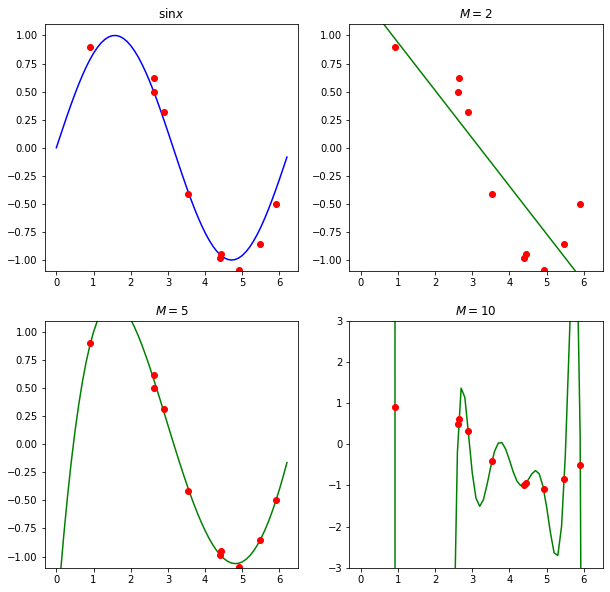

In [5]:
# Plot the graphs with different M (number of parameters)

def gen_plot_data_from_poly(num_parameters):
    poly = fitted_polynomial(num_parameters)
    poly_x = sin_x
    poly_y = [poly(x) for x in poly_x]
    return (poly_x, poly_y)

plot1 = gen_plot_data_from_poly(2)
plot2 = gen_plot_data_from_poly(5)
plot3 = gen_plot_data_from_poly(10)

fig, axes = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(10)

axes[0, 0].plot(sin_x, sin_y, 'b-', training_data_x, training_data_y, 'ro');
axes[0, 0].set_ylim(-1.1, 1.1);
axes[0, 0].set_title(r"$\sin{x}$");
axes[0, 1].plot(plot1[0], plot1[1], 'g-', training_data_x, training_data_y, 'ro');
axes[0, 1].set_ylim(-1.1, 1.1);
axes[0, 1].set_title(r"$M = 2$");
axes[1, 0].plot(plot2[0], plot2[1], 'g-', training_data_x, training_data_y, 'ro');
axes[1, 0].set_ylim(-1.1, 1.1);
axes[1, 0].set_title(r"$M = 5$");
axes[1, 1].plot(plot3[0], plot3[1], 'g-', training_data_x, training_data_y, 'ro');
axes[1, 1].set_ylim(-3, 3);
axes[1, 1].set_title(r"$M = 10$");